## Imports

In [223]:
import sys
import re, numpy as np, pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [224]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as pl

In [225]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [226]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [227]:
# Import Dataset
df = pd.read_json('Mckinsey_Articles.json')
print(df.shape)  #> (2361, 3)
df.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/seven-healthcar...,Shubham Singhal,"Healthcare is an essential, dynamic, and opportunity-rich industry. The demand for innovation to...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Trends to Watch in 2020\r\n\t\t\t\t\t
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/big-bigger-bigg...,,have made it possible to cheaply and quickly sequence the genomes of large groups of people. Fo...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO Peter Løngreen on Denmark’s national genome proje..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/how-healthcare-...,,Today I am joined by Matt Holt who is a managing director at New Mountain Capital. He is the he...,\r\n\t\t\t\t\t\tHow healthcare investing efforts can drive innovation: a conversation with Matt ...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/the-role-of-aca...,,"Cathy and Tom, thank you so much for joining us.Today, we’re hoping to focus on the role of aca...",\r\n\t\t\t\t\t\tThe role of academic-based health systems: An interview with Catherine Jacobson ...


In [228]:
#Creates a new dataframe that only contains articles from 2017
df2017=df[df['Article_date'].str.contains('2017')]
df2017

,Article_date,Article_type,Article_url,author,body,titletext
29,May 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/looking-ahead-i...,Razili Lewis,"In a series of papers, McKinsey’s Center for US Health System Reform has been exploring major ch...",\r\n\t\t\t\t\t\tLooking ahead in Medicaid: Options for states and the implications for payors an...
34,May 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/us-health-insur...,,"In a comparative sense, the US health insurance industry is young (certainly compared with hospi...",\r\n\t\t\t\t\t\tUS health insurers: An endangered species?\r\n\t\t\t\t\t
35,May 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/value-based-car...,,"Most people in the healthcare industry agree—in theory, at least—that the time is right for valu...",\r\n\t\t\t\t\t\tValue-based care: Is it sustainable?\r\n\t\t\t\t\t
46,January 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/how-to-tame-ris...,Erica Coe,\n tame healthcare-cost inflation? We believe that two steps—increasing healthcare-sector produc...,\r\n\t\t\t\t\t\tHow to tame rising US healthcare costs\r\n\t\t\t\t\t
47,January 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/the-growth-oppo...,Patrick Finn,\n for private health insurance—already €1.3 trillion—are expected to double by 2025 (Exhibit 1)...,\r\n\t\t\t\t\t\tThe growth opportunity for private health-insurance companies\r\n\t\t\t\t\t
49,April 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/winning-in-priv...,Shubham Singhal,"Historically, the ability of many private health insurers to achieve consistent profits from inv...",\r\n\t\t\t\t\t\tWinning in private health insurance through technical excellence\r\n\t\t\t\t\t
50,April 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/what-can-states...,Erica Coe,There’s a lot of discussion about changes to the Affordable Care Act through the legislative ro...,\r\n\t\t\t\t\t\tWhat can states do to change key parameters of the individual market?\r\n\t\t\t\t\t
54,February 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/potential-impac...,Shubham Singhal,"Enrollment in the individual market has now reached close to 18 million people, roughly 10 milli...",\r\n\t\t\t\t\t\tPotential impact of individual market reforms\r\n\t\t\t\t\t
60,November 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/planning-for-th...,Brendan Buescher,DISCLAIMER: The views and opinions expressed are those of the interviewee(s) and are not necessa...,"\r\n\t\t\t\t\t\tPlanning for the future of healthcare—Marc Harrison, President & CEO, Intermount..."
61,November 2017,Article,https://www.mckinsey.com/industries/healthcare-systems-and-services/our-insights/planning-for-th...,,"Ken Burdick, CEO, WellCare shares his perspective on major trends and opportunities in US health...","\r\n\t\t\t\t\t\tPlanning for the future of healthcare—Ken Burdick, CEO, WellCare\r\n\t\t\t\t\t"


## Tokenize Sentences and Clean

In [229]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  
        
#Convert to list
data = df2017.body.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['in', 'series', 'of', 'papers', 'mckinsey', 'center', 'for', 'us', 'health', 'system', 'reform', 'has', 'been', 'exploring', 'major', 'changes', 'to', 'the', 'us', 'health', 'system', 'that', 'may', 'be', 'on', 'the', 'horizon', 'the', 'first', 'report', 'discussed', 'the', 'two', 'steps', 'increasing', 'healthcare', 'sector', 'productivity', 'and', 'improving', 'healthcare', 'market', 'functioning', 'that', 'can', 'better', 'balance', 'the', 'supply', 'of', 'and', 'demand', 'for', 'health', 'services', 'it', 'also', 'described', 'these', 'steps', 'potential', 'to', 'produce', 'sufficient', 'savings', 'to', 'lower', 'medical', 'cost', 'inflation', 'to', 'the', 'rate', 'of', 'gross', 'domestic', 'product', 'gdp', 'growth', 'the', 'second', 'report', 'explored', 'wide', 'range', 'of', 'changes', 'that', 'have', 'been', 'proposed', 'to', 'stabilize', 'the', 'individual', 'market', 'and', 'the', 'effect', 'some', 'of', 'these', 'proposals', 'could', 'have', 'on', 'claims', 'costs', 'and'

## Build the Bigram, Trigram Models and Lemmatize

In [230]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
# or do
# !conda install -c conda-forge spacy-model-en_core_web_md 
# and use nlp=spacy.load('en_core_web_sm') instead in below function.
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

## Build the Topic Model

In [231]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.020*"patient" + 0.013*"system" + 0.010*"datum" + 0.010*"people" + '
  '0.009*"really" + 0.008*"way" + 0.008*"percent" + 0.007*"company" + '
  '0.007*"management" + 0.007*"create"'),
 (1,
  '0.033*"claim" + 0.016*"insurer" + 0.012*"waiver" + 0.010*"carrier" + '
  '0.008*"case" + 0.008*"state" + 0.007*"enrollment" + 0.006*"process" + '
  '0.006*"coverage" + 0.006*"individual"'),
 (2,
  '0.012*"health" + 0.011*"care" + 0.010*"consumer" + 0.010*"cost" + '
  '0.009*"provider" + 0.008*"healthcare" + 0.007*"growth" + 0.006*"market" + '
  '0.006*"base" + 0.006*"model"'),
 (3,
  '0.026*"company" + 0.014*"organization" + 0.011*"market" + 0.009*"agility" + '
  '0.008*"business" + 0.008*"customer" + 0.007*"team" + 0.007*"payor" + '
  '0.007*"agile" + 0.006*"product"')]


## Dominant topics and their percentage contribution in each document

In [232]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9931,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[health, system, reform, explore, major, change, health, system, first, report, discuss, step, i..."
1,1,2.0,0.9993,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[comparative, sense, health, insurance, industry, young, certainly, compare, hospital, century, ..."
2,2,2.0,0.9981,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[people, industry, agree, theory, least, time, value, base, service, reimbursement, become, incr..."
3,3,2.0,0.9156,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[cost, inflation, believe, step, increase, healthcare, sector, productivity, improve, healthcare..."
4,4,2.0,0.7135,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[private, health, insurance, already, expect, double, exhibit, demand, healthcare, service, henc..."
5,5,2.0,0.5748,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[historically, ability, private, health, insurer, achieve, consistent, profit, investment, resul..."
6,6,1.0,0.9905,"claim, insurer, waiver, carrier, case, state, enrollment, process, coverage, individual","[discussion, change, affordable, legislative, route, work, different, waiver, authority, waiver,..."
7,7,2.0,0.6758,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[enrollment, reach, close, people, roughly, exchange, however, affordability, remain, concern, a..."
8,8,0.0,0.8168,"patient, system, datum, people, really, way, percent, company, management, create","[view, opinion, express, interviewee, necessarily, mckinsey, company, question, industry, stay, ..."
9,9,2.0,0.6671,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[share, perspective, major, trend, opportunitie, disclaimer, view, opinion, express, interviewee..."


## The Most Representative Sentence for Each Topic

In [233]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8168,"patient, system, datum, people, really, way, percent, company, management, create","[view, opinion, express, interviewee, necessarily, mckinsey, company, question, industry, stay, ..."
1,1.0,0.9940,"claim, insurer, waiver, carrier, case, state, enrollment, process, coverage, individual","[much, sharing, expertise, discussion, change, affordable, legislative, route, work, different, ..."
2,2.0,0.9995,"health, care, consumer, cost, provider, healthcare, growth, market, base, model","[inception, expand, role, state, governance, usually, first, second, large, state, program, nati..."
3,3.0,0.7034,"company, organization, market, agility, business, customer, team, payor, agile, product","[strong, economic, growth, spark, enthusiasm, opportunity, pharmaceutical, market, capture, prom..."


## Word Counts of Topic Keywords

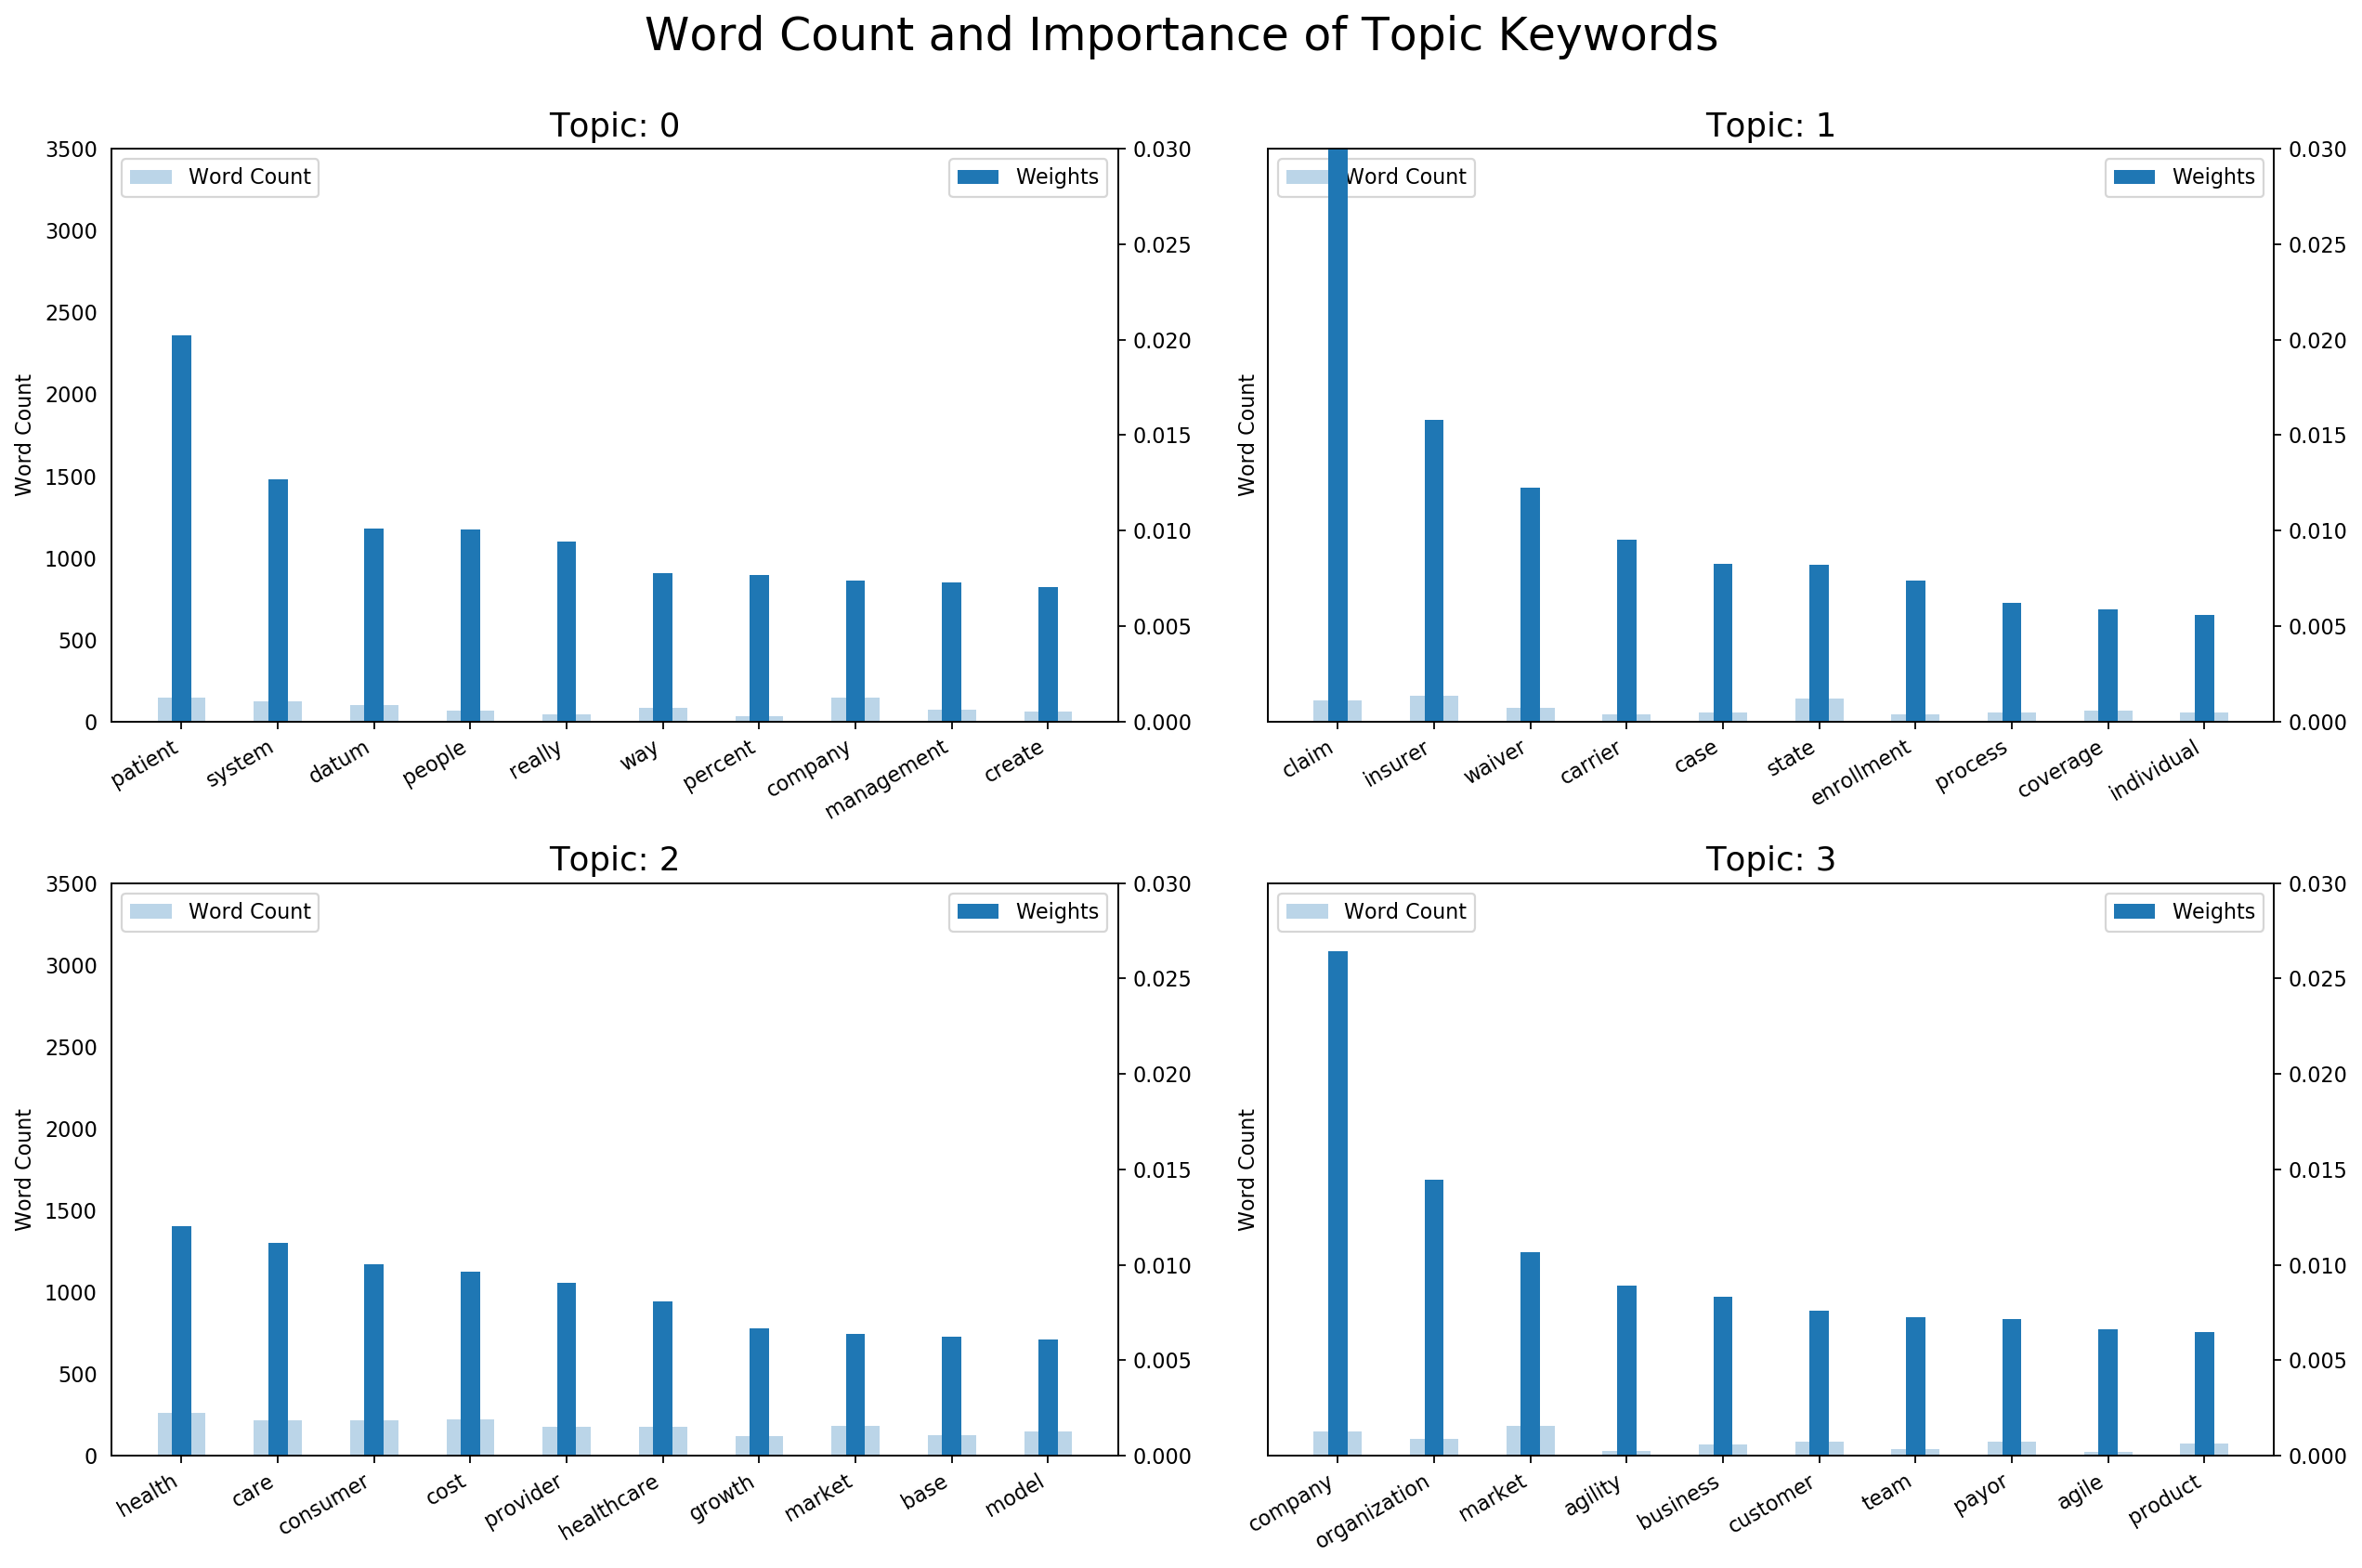

In [234]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Most Discussed Topics in the Documents

In [235]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

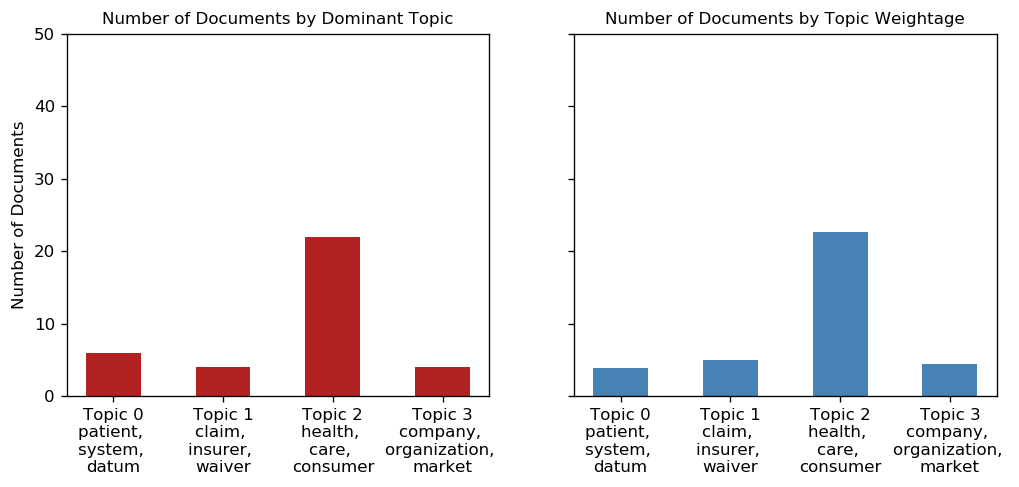

In [236]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 50)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [237]:
#Shows the number of documents that each topic dominated
df_dominant_topic_in_each_doc

,Dominant_Topic,count
0,0,6
1,1,4
2,2,22
3,3,4
